## Implementing the maximum subarray algorithm seen in CLRS 4.1
### two components :

1. function find_max_crossing_subarray:
-The task which finds a maximum subarray that crosses a midpoint of an array, and 

2. function 
-Recursively applies this task to a large array

In [39]:
import math
print math.floor((1+4)/2) #gives 2.o
# by default, should take the floor when integers are used:
print 5/2

2.0
2


In [40]:
range(5,10)

[5, 6, 7, 8, 9]

In [41]:
def find_max_crossing_subarray(A, low, mid, high):
    left_sum = -float("inf")
    test_sum = 0
    #we actually want this to include the mid and the 0, so we do low-1 in range()
    for i in range(mid,low-1,-1):
        #print 'i=',i
        test_sum = test_sum + A[i]
        if test_sum > left_sum :
            left_sum = test_sum
            max_left = i
    right_sum = -float("inf")
    test_sum = 0
    #again we want to include the highest index, so say high+1 here in range()
    for j in range(mid+1,high+1):
        #print 'j=',j
        test_sum = test_sum + A[j]
        if test_sum > right_sum :
            right_sum = test_sum
            max_right = j
    return [max_left, max_right, left_sum + right_sum]


In [42]:
def find_max_subarray(A, low, high):
    if high == low:
        return([low, high, A[low]])
    else:
        mid = (low + high) / 2 # note since these are integers, odd#/2 will give the floor
        [left_low, left_high, left_sum] = find_max_subarray(A, low, mid)
        [right_low, right_high, right_sum] = find_max_subarray(A, mid+1, high)
        [cross_low, cross_high, cross_sum] = find_max_crossing_subarray(A, low, mid, high)
        
        if left_sum >= right_sum & left_sum >= cross_sum:
            return [left_low, left_high, left_sum]
        elif right_sum >= left_sum & right_sum >= cross_sum:
            return [right_low, right_high, right_sum]
        else:
            return [cross_low, cross_high, cross_sum]

A (price) :  [85, 29, 93, 53, 44, 63, 24, 26, 96, 28, 64, 43, 40, 31, 27, 90, 77, 35, 68, 32, 95, 98, 49, 37, 82, 60, 17, 16, 38, 23, 94, 67, 65, 11, 69, 45, 62, 57, 46, 48, 34, 75, 51, 15, 42]
44
B (change in price) :  [-56, 64, -40, -9, 19, -39, 2, 70, -68, 36, -21, -3, -9, -4, 63, -13, -42, 33, -36, 63, 3, -49, -12, 45, -22, -43, -1, 22, -15, 71, -27, -2, -54, 58, -24, 17, -5, -11, 2, -14, 41, -24, -36, 27]


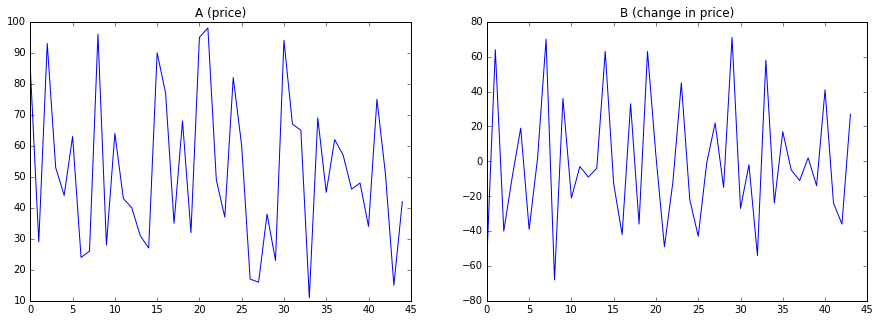

In [43]:
import random
random.seed(111)
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
#make A a list of 44 random integers ranging from 10 to 100
A = random.sample(xrange(10,101), 45)
print 'A (price) : ', A
#define B as the difference between i and i+1 for all i in A
B = []
for i in range(len(A)-1):
    B.append(A[i+1]-A[i])
print len(B)
print 'B (change in price) : ', B
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(range(45),A)
ax1.set_title('A (price)')
ax2.plot(range(44),B)
ax2.set_title('B (change in price)')
f.set_size_inches(15,5)

In [44]:
A[:10]

[85, 29, 93, 53, 44, 63, 24, 26, 96, 28]

In [45]:
B[:10]

[-56, 64, -40, -9, 19, -39, 2, 70, -68, 36]

In [46]:
B[7]

70

In [47]:
B[1]

64

In [48]:
64-40-9+19-39+72

67

In [49]:
# test the algorithm on small array B[0:10]
print 'testing algorithm on first 10 elements of B : '
print B[0:10]
[l_cross_ind, r_cross_ind, profit_cross] = find_max_crossing_subarray(B, 0, 4, 9)
# note the 0, 4 , 9 splits into 2 subarrays with 5 elements each 0:4 and 5:9 inclusive
print 'you should buy at index ', l_cross_ind
print 'you should sell at index ', r_cross_ind
print 'so your profit will be ', profit_cross

testing algorithm on first 10 elements of B : 
[-56, 64, -40, -9, 19, -39, 2, 70, -68, 36]
you should buy at index  1
you should sell at index  7
so your profit will be  67


In [50]:
#a[r_cross_ind+1] - a[l_cross_ind]

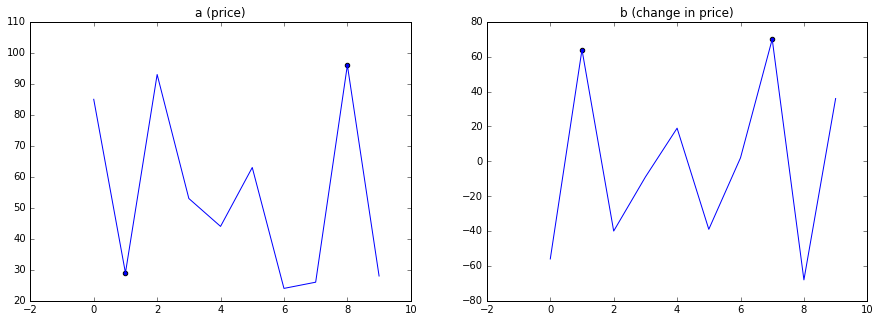

In [51]:
# now plot where to buy and sell on the plots for A and B (small arrays)
a=A[:10]
b=B[:10]
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(range(len(a)),a)
ax1.set_title('a (price)')
ax1.scatter(l_cross_ind, a[l_cross_ind])
ax1.scatter(r_cross_ind+1, a[r_cross_ind+1] ) #add one to right index for A array since you want to sell after the change

ax2.plot(range(len(b)),b)
ax2.set_title('b (change in price)')
ax2.scatter(l_cross_ind, b[l_cross_ind])
ax2.scatter(r_cross_ind, b[r_cross_ind] )
f.set_size_inches(15,5)

In [58]:
# now test on the large array:
[left_index, right_index, profit] = find_max_subarray(B, 0, len(B)-1)
print 'left index : ', left_index
print 'right index : ', right_index
print 'profit : ', profit

left index :  6
right index :  20
profit :  74


In [57]:
right_index

20

In [53]:
left_index

6

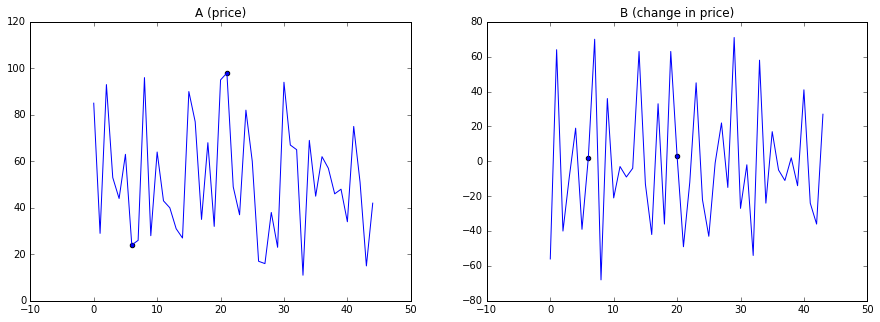

In [54]:
# now plot where to buy and sell on the plots for A and B
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(range(45),A)
ax1.set_title('A (price)')
ax1.scatter(left_index, A[left_index])
ax1.scatter(right_index+1,A[right_index+1] )

ax2.plot(range(44),B)
ax2.set_title('B (change in price)')
ax2.scatter(left_index, B[left_index])
ax2.scatter(right_index,B[right_index] )
f.set_size_inches(15,5)

In [55]:
A[20]-A[6]

71

In [56]:
A[21]-A[6]

74

In [60]:
A[21]

98

In [68]:
A[30]

94

In [72]:
A[27]

16

In [73]:
A[30]-A[27]

78

In [65]:
np.array(A)

array([85, 29, 93, 53, 44, 63, 24, 26, 96, 28, 64, 43, 40, 31, 27, 90, 77,
       35, 68, 32, 95, 98, 49, 37, 82, 60, 17, 16, 38, 23, 94, 67, 65, 11,
       69, 45, 62, 57, 46, 48, 34, 75, 51, 15, 42])

In [67]:
np.max(np.array(A))

98